# Loan Default Prediction - Feature Engineering 

#### We are visiting feature engieering step after our inital modeling (Refer to model notebook). 

During our first modeling stage using KERAS and PYTORCH models had difficulty distinguishing between defaults and non-defaults. This issue persisted despite applying class weights to handle the class imbalance.

We are going to import raw data so we can try a different label encoding option. Such has one-hot encoding


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [10]:
loan_data = pd.read_csv('../raw/raw_loan_default.csv')

loan_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [12]:
missing = loan_data.isnull().sum()
print(missing)

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [13]:
loan_data.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [14]:
loan_data = loan_data.drop('LoanID', axis=1)

In [15]:
loan_data.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### Quick visualization

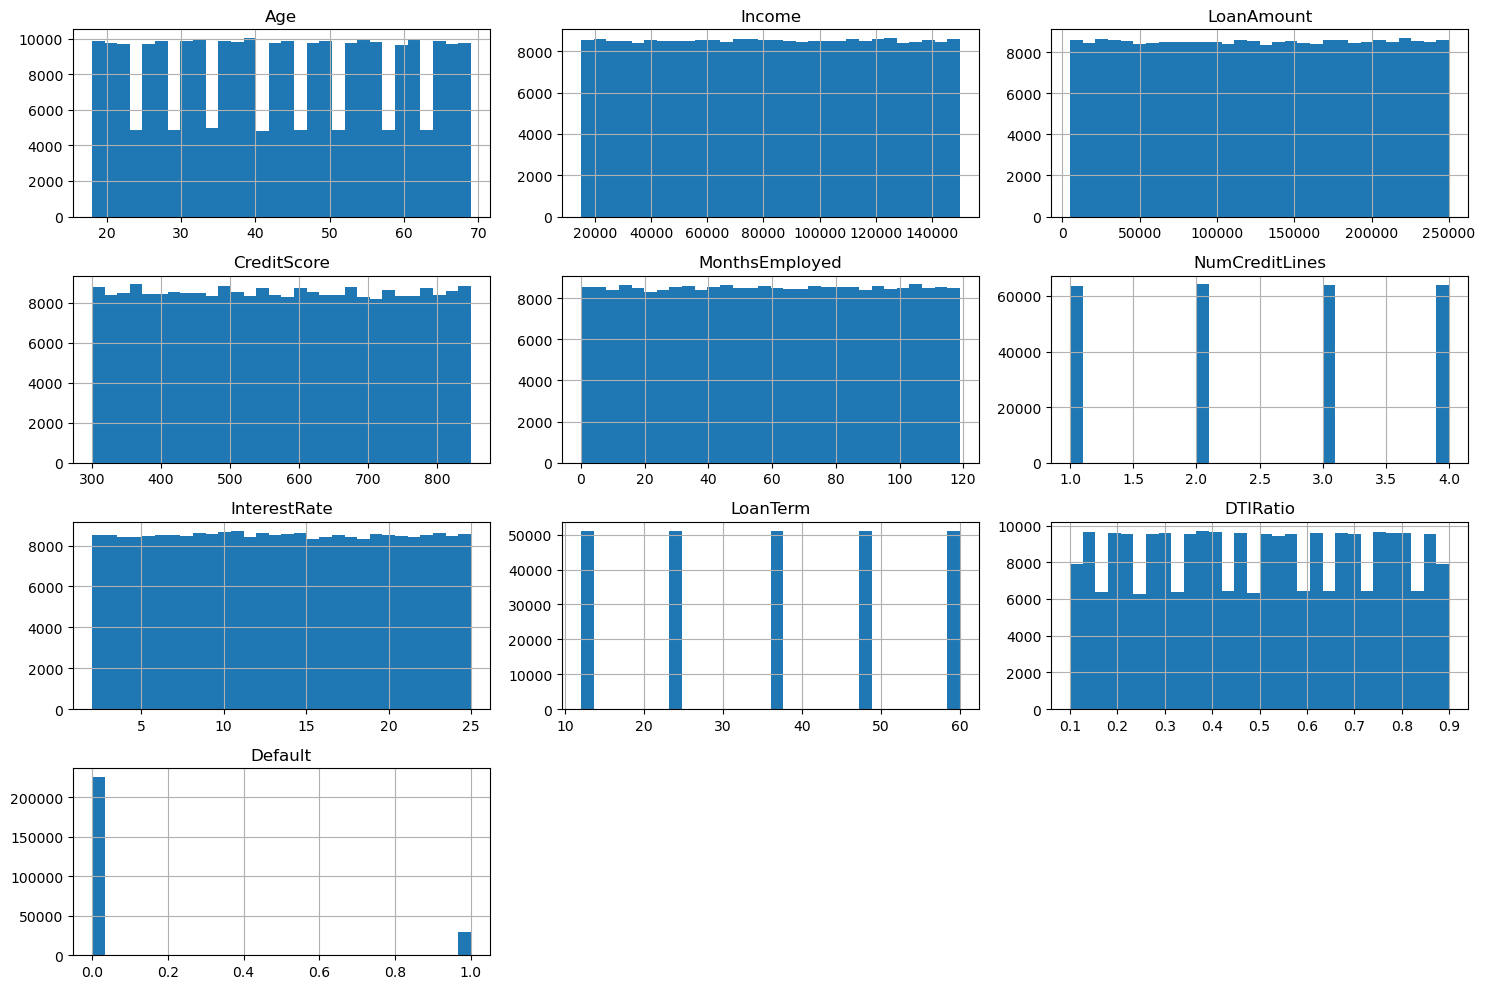

In [17]:
df = loan_data
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Categorical Features
This time we will Encode categorical variables using one-hot encoding instead of label encoder


In [18]:
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 
                       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

df = pd.get_dummies(loan_data, columns=categorical_columns, drop_first=True)

df.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,True,False,False,False,False,False,False,True,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,True,False,False,True,True,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,True,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,True,False,False,False,False,False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Default                       255347 non-null  int64  
 10  Education_High School         255347 non-null  bool   
 11  Education_Master's            255347 non-null  bool   
 12  Education_PhD                 255347 non-nul

### Handling Imbalanced dataset


In [21]:
df["Default"].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [22]:
default_0 = df[df['Default'] == 0]
default_1 = df[df['Default'] == 1]

In [23]:
print('default_0', default_0.shape)
print('default_1', default_1.shape)

default_0 (225694, 25)
default_1 (29653, 25)


In [24]:
from sklearn.utils import resample
df_minority_upsampled = resample(default_1, replace = True, n_samples = 225694)
data = pd.concat([default_0, df_minority_upsampled])

In [25]:
from sklearn.utils import shuffle
data = shuffle(data)

In [28]:
data['Default'].value_counts()  

Default
0    225694
1    225694
Name: count, dtype: int64

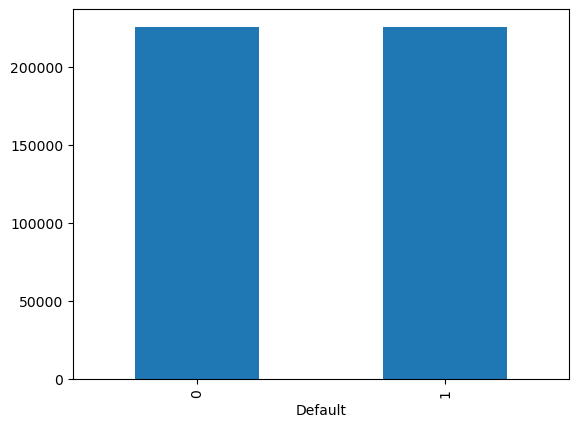

In [29]:
data['Default'].value_counts().plot(kind = "bar")
plt.show()

In [32]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
195435,43,88220,209734,344,82,2,21.35,24,0.63,0,...,False,True,False,True,False,False,False,False,True,False
253228,36,17112,163499,731,42,3,22.92,24,0.18,1,...,False,False,False,True,False,False,False,False,False,False
89938,32,29999,52078,818,99,4,22.32,24,0.57,1,...,False,True,False,False,False,True,False,False,False,True
102018,31,80560,90268,625,29,4,20.77,60,0.34,1,...,False,False,True,False,True,False,False,True,False,True
251592,35,58497,239825,540,3,1,2.22,36,0.33,1,...,False,True,False,True,True,True,False,False,False,True


### We are going to export this resampled data

In [33]:
datapath = '../data/loan_data_resampled.csv'
data.to_csv(datapath, index=False)

print("Data saved")

Data saved


In [36]:
df = data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,451388.0,40.499497,14.928940,18.0,27.00,39.00,53.00,69.0
Income,451388.0,77888.666805,40153.524394,15000.0,41682.00,76181.00,112804.00,149999.0
LoanAmount,451388.0,134962.301477,70718.260926,5000.0,74940.00,138591.00,197410.25,249999.0
CreditScore,451388.0,567.980870,158.855924,300.0,430.00,565.00,704.00,849.0
MonthsEmployed,451388.0,55.440304,34.626827,0.0,25.00,53.00,85.00,119.0
NumCreditLines,451388.0,2.538404,1.118279,1.0,2.00,3.00,4.00,4.0
InterestRate,451388.0,14.532531,6.610360,2.0,8.99,15.01,20.34,25.0
LoanTerm,451388.0,36.067179,16.968446,12.0,24.00,36.00,48.00,60.0
DTIRatio,451388.0,0.505255,0.230322,0.1,0.31,0.51,0.71,0.9
Default,451388.0,0.500000,0.500001,0.0,0.00,0.50,1.00,1.0


##### We are going to check for Skewness

In [37]:
df.skew()

Age                             0.245525
Income                          0.113376
LoanAmount                     -0.127287
CreditScore                     0.048435
MonthsEmployed                  0.139411
NumCreditLines                 -0.045625
InterestRate                   -0.185319
LoanTerm                       -0.004246
DTIRatio                       -0.028912
Default                         0.000000
Education_High School           1.077518
Education_Master's              1.206841
Education_PhD                   1.220029
EmploymentType_Part-time        1.124254
EmploymentType_Self-employed    1.168904
EmploymentType_Unemployed       1.047424
MaritalStatus_Married           0.777485
MaritalStatus_Single            0.689950
HasMortgage_Yes                 0.053561
HasDependents_Yes               0.082572
LoanPurpose_Business            1.453381
LoanPurpose_Education           1.495488
LoanPurpose_Home                1.574178
LoanPurpose_Other               1.490494
HasCoSigner_Yes 

Our numerical features have low skewness so there is no need for Log Transformation. Categorial features are okay with high skewness since they are one-hot encoded. 

In [38]:
matrix = df.corr()

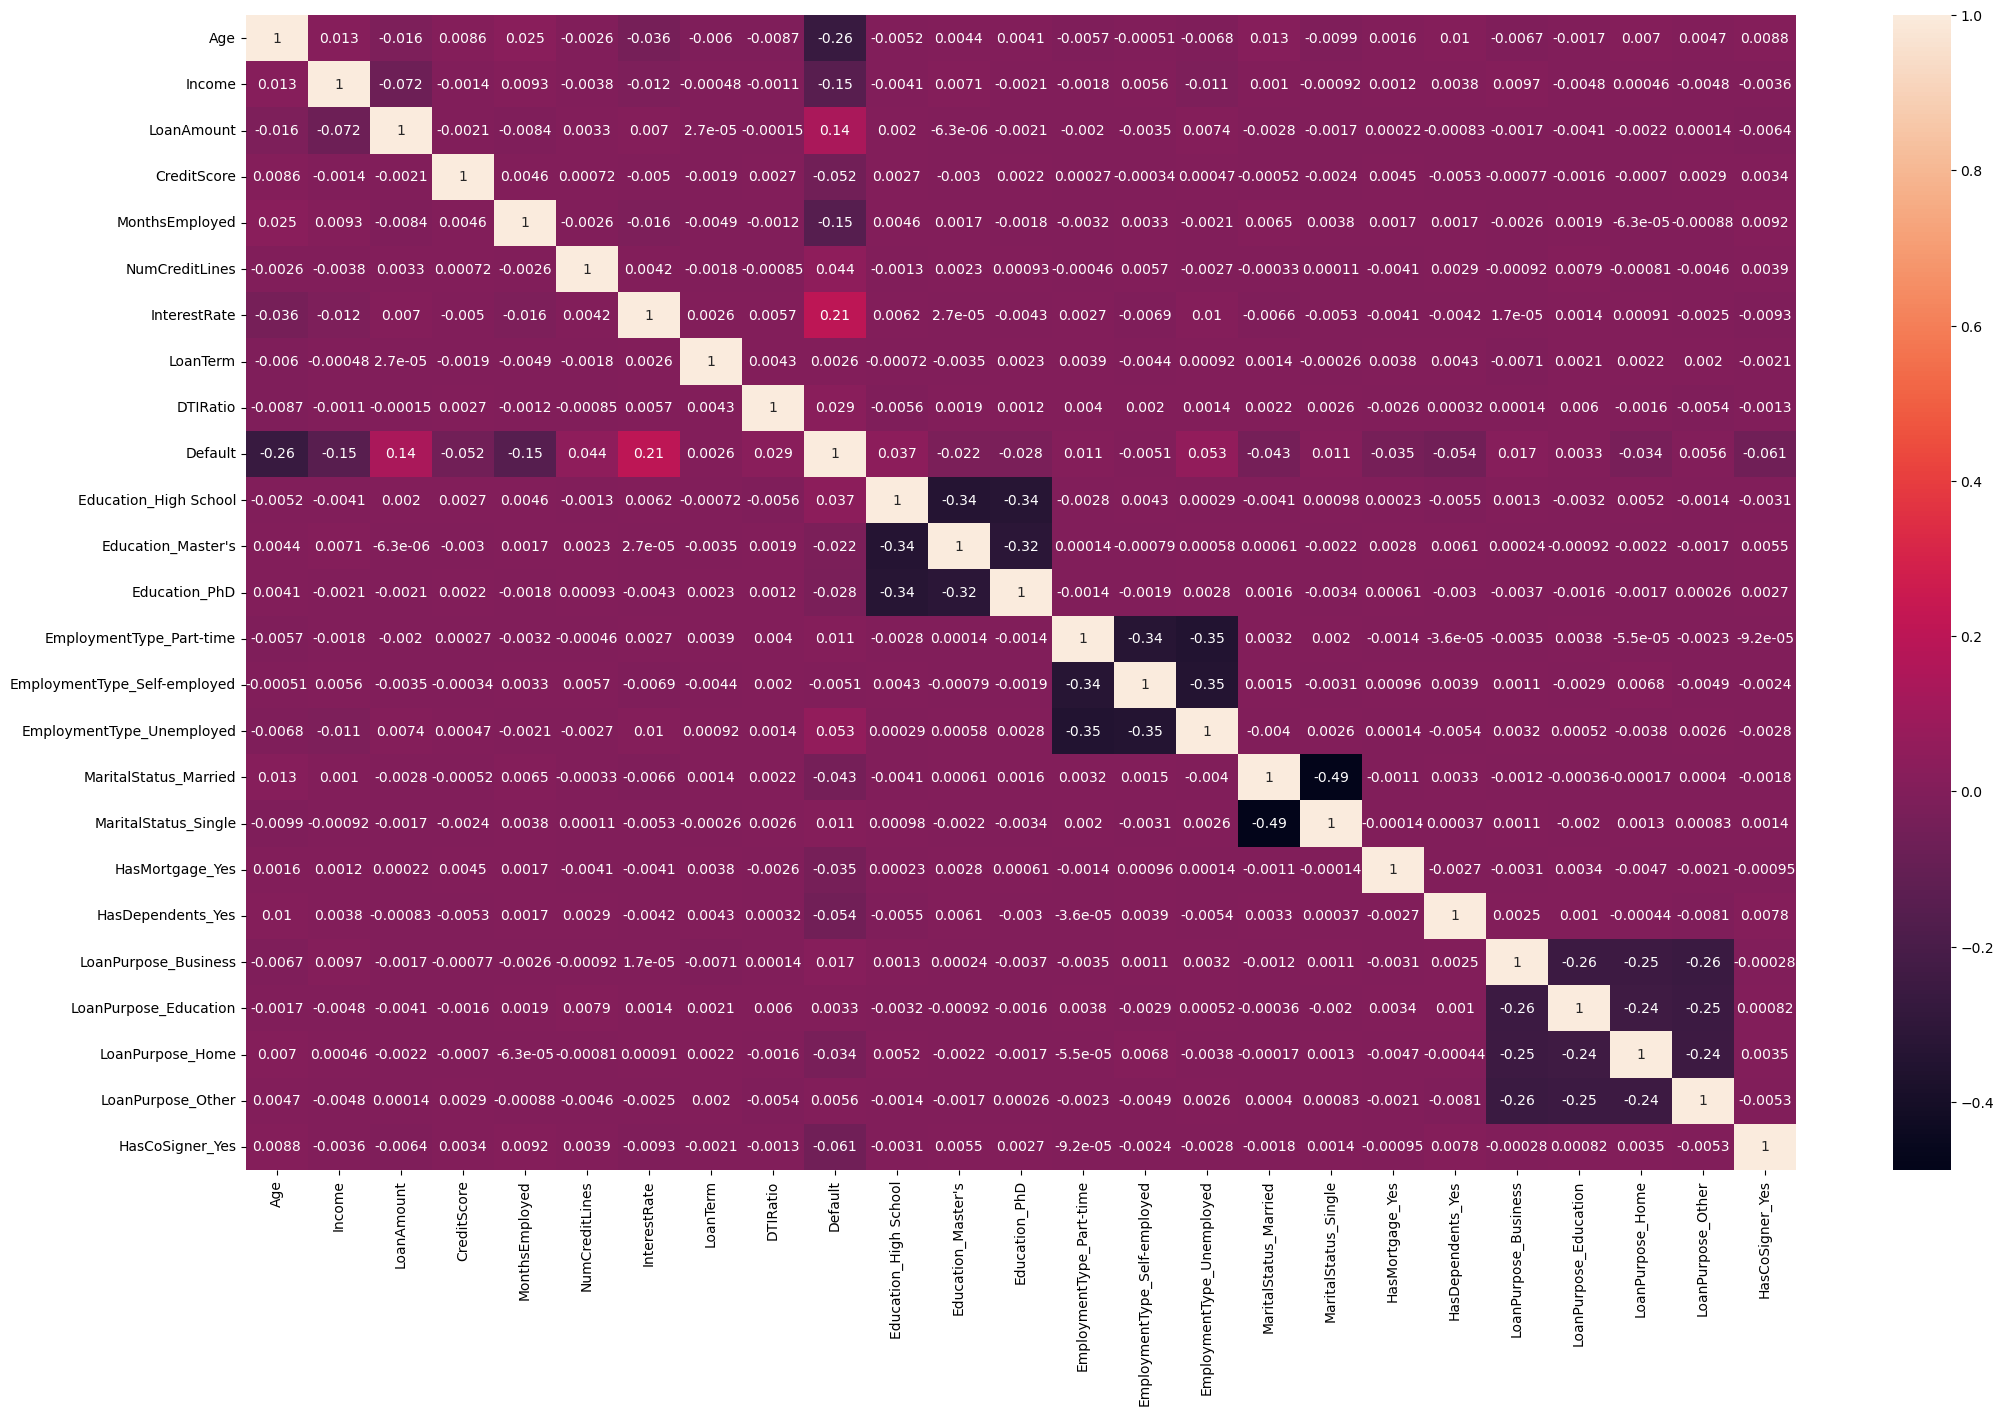

In [56]:
plt.figure(figsize = (25,15))
sns.heatmap(data = df.corr(), annot = True)
plt.show()

In [58]:
cor_pairs = matrix.unstack()
sorted_pairs = cor_pairs.sort_values(kind = 'quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.2]

print(strong_pairs)

MaritalStatus_Single          MaritalStatus_Married          -0.487709
MaritalStatus_Married         MaritalStatus_Single           -0.487709
EmploymentType_Unemployed     EmploymentType_Part-time       -0.354022
EmploymentType_Part-time      EmploymentType_Unemployed      -0.354022
EmploymentType_Unemployed     EmploymentType_Self-employed   -0.347232
EmploymentType_Self-employed  EmploymentType_Unemployed      -0.347232
Education_High School         Education_Master's             -0.337105
Education_Master's            Education_High School          -0.337105
EmploymentType_Self-employed  EmploymentType_Part-time       -0.335705
EmploymentType_Part-time      EmploymentType_Self-employed   -0.335705
Education_High School         Education_PhD                  -0.335210
Education_PhD                 Education_High School          -0.335210
Education_Master's            Education_PhD                  -0.316907
Education_PhD                 Education_Master's             -0.316907
Age   

### Now that we have resampled out data and tried a slightly different encoder. 

We are going to export and try our model before doing other feature engineering. 


In [59]:
datapath = '../data/loan_data_fe_complete.csv'
df.to_csv(datapath, index=False)

print("Data saved")

Data saved
